# K-Means on Human Resource Data Set

**Simulated Data courtesy of Ludovic Benistant via https://www.kaggle.com/ludobenistant/hr-analytics**

**Demonstration of K-means Algorithm Using HR data** 


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import csv

## Initializing Data and Variables

In [13]:
test_size = 1000

cross_validation_percent = .2 

k = 3

salaries = {'low': .2,
            'medium': .5,
            'high' : 1
            }
colors = {
    0: 'r',
    1: 'g',
    2: 'orange',
    3: 'b',
    4: 'y',
    5: 'black',
    6: 'purple'
}
iter_number = 12

**Load data from file, store in a variable called data, then print to check if it worked**

In [14]:
# Load data
filename = 'C:/users/brandonwood/desktop/create/2017.csv'

def openf(filename):
    data = []
    with open(filename, 'r') as csvfile:
        plots = csv.reader(csvfile, delimiter = ',')
        for row in plots:
            data.append(row)
    return data
data = openf(filename)

print(data[0])

['0.38', '0.53', '2', '157', '3', '0', '1', '0', 'low']


## Cleaning the Data

**Here we clean the data.The last column of every person in the data set is their wage, grouped as either low, medium, or high. We convert those into real numbers and turn that into a numpy arrray, then slim down the training set.**

In [15]:
# Conver wage classes into real numbers
def convert_from_dict(data, salaries):
    for person in data:
        for key, val in salaries.items():
            if person[8] == key:
                person[8] =  val
    return data

data = convert_from_dict(data, salaries)

# Convert to numpy array of ints
# for num, row in enumerate(data):
#     for n, element in enumerate(row):
#         data[num][n] = float(element)
data = np.asarray(data, dtype = 'float')



# Slimming Data
np.random.shuffle(data)
data = data[:test_size]
data = data[:, :2]

print(data[-1])
print(data.shape)

[ 0.92  0.67]
(1000, 2)


## Checking Data

** We graph the first two axis of the data against one another to ensure the data is stored properly, and, more importantly, attempt to visualize it.**

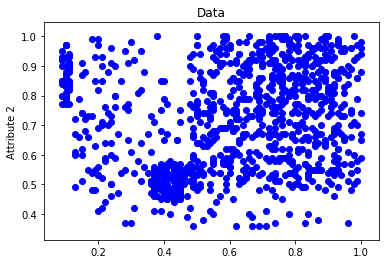

In [16]:
plt.scatter(data[:,0], data[:,1], color = 'b')
plt.title("Data")
plt.ylabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.show()

## Initializing Centroids

**We randomly initialize the k centroids, and graph them.**

In [17]:
# Randomly select centroids
def init_centroids(data, k):
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
# Randomly Init with k centroids
centroids = init_centroids(data, k)
print(centroids)

[[ 0.88  0.8 ]
 [ 0.13  0.61]
 [ 0.39  0.56]]


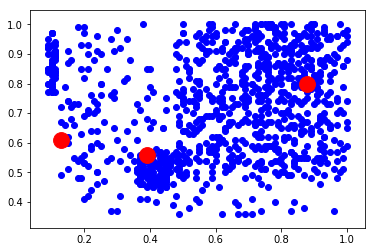

In [18]:
# Draw some of the data with centroids
plt.scatter(data[:test_size,0], data[:test_size,1], color = 'b')
plt.scatter(centroids[:,0], centroids[:,1], color ='r', marker = 'o', s = 250)
plt.show()

## Writing the Algorithm
** Now that we have the data and the centroids, we can start running the algorithm. The k-means algorithm works in two steps:** 

1. Group the data into clusters.
2. Move the centroids towards the center of their clusters. 

<i> **We do this until no more data points move clusters after the centroids move.** </i>


### Step 1 Definitions - Assigning Clusters

### Generating a Distance Matrix.

**Our goal is to create a distance matrix where the element[i,j] shows the distance beween the ith person in the data set and the jth centroid.**

In [19]:
def distance(X, Y):
    X2 = np.sum(X**2, axis=1, keepdims=True)
    Y2 = np.sum(Y**2, axis=1)
    XY = -2*np.dot(X, Y.T)
    total = X2 + Y2 + XY
    return np.sqrt(total)


def average_distance(clusters, centroids, distances):
    average_distances = np.zeros(k)
    count = np.zeros(k)
    for person, index in enumerate(clusters):
        average_distances[int(index)] += distances[person][int(index)]
        count[int(index)] += 1
    average_distances /= count
    
    return np.sum(average_distances)

** We can then generate a new vector to hold the index of the closest centroid for each person.**

In [20]:
def assign_everyone():
    distances = distance(data, centroids)
    
    clusters = np.zeros(distances.shape[0])
    
    for row, person in enumerate(distances):
        closest_index = 0
        for num, centroid_dist in enumerate(person):
            if centroid_dist < person[closest_index]:
                closest_index = num
        clusters[row] = closest_index
    
    return clusters
        
    
clusters = assign_everyone()

print(clusters)

[ 2.  2.  0.  0.  2.  0.  2.  0.  0.  0.  2.  0.  2.  0.  2.  0.  0.  2.
  0.  0.  2.  0.  2.  0.  1.  0.  0.  2.  0.  2.  0.  0.  0.  0.  1.  0.
  0.  0.  2.  1.  1.  0.  0.  1.  0.  1.  1.  0.  1.  2.  0.  2.  2.  0.
  1.  0.  0.  0.  0.  2.  0.  0.  0.  2.  0.  0.  2.  0.  2.  2.  1.  0.
  2.  1.  1.  2.  0.  1.  0.  2.  0.  2.  2.  0.  0.  2.  0.  0.  1.  2.
  0.  0.  0.  2.  2.  2.  1.  2.  0.  0.  2.  0.  2.  0.  2.  1.  0.  0.
  0.  0.  0.  2.  2.  2.  2.  2.  0.  2.  0.  0.  1.  2.  1.  2.  0.  1.
  0.  2.  1.  2.  2.  0.  0.  2.  0.  0.  0.  0.  0.  0.  2.  2.  2.  0.
  2.  0.  2.  0.  2.  2.  0.  0.  2.  0.  0.  1.  0.  2.  1.  0.  0.  0.
  1.  1.  2.  0.  0.  0.  2.  0.  0.  2.  2.  2.  2.  2.  2.  2.  2.  0.
  2.  0.  0.  0.  1.  0.  2.  0.  2.  2.  2.  0.  2.  2.  2.  0.  0.  2.
  0.  2.  0.  2.  1.  0.  2.  0.  0.  2.  0.  0.  0.  0.  2.  0.  2.  0.
  0.  0.  0.  1.  1.  2.  2.  2.  0.  1.  2.  0.  2.  1.  1.  0.  1.  2.
  0.  0.  0.  1.  0.  2.  1.  2.  0.  0.  0.  0.  0

## Step 2 Definintions - Moving the Centroids

In [21]:
def move_centroids():
    new_centroids = np.zeros(centroids.shape)
    counter = np.zeros(centroids.shape)
    
    for pi, index in enumerate(clusters):
        new_centroids[int(index)] += data[pi]
        counter[int(index)] += 1
    new_centroids /= counter
    return new_centroids
          
centroids = move_centroids()
print(centroids)

[[ 0.79531073  0.78269303]
 [ 0.16540323  0.77572581]
 [ 0.48281159  0.5724058 ]]


## Running the Algorithm

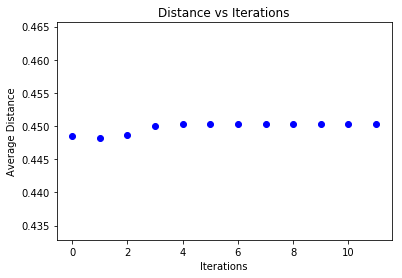

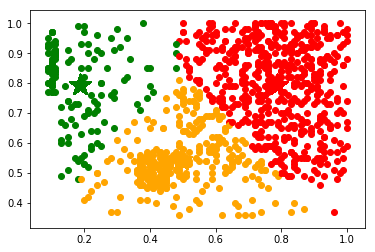

In [22]:
new_clusters = assign_everyone()
count = 0

average_distances = np.zeros(iter_number)

while new_clusters.all() != clusters.all() or count < iter_number:

    clusters = new_clusters
    centroids = move_centroids()
    new_clusters = assign_everyone()

    distances = distance(data, centroids)
    average_distances[count] += average_distance(clusters, centroids, distances)
    
    count += 1

plt.scatter(range(iter_number), average_distances[:], color = 'b')
plt.title('Distance vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Average Distance')
plt.show()


for idx, person in enumerate(data):
    plt.scatter(person[0], person[1], color = colors[int(clusters[idx])])
    plt.scatter(centroids[int(clusters[idx])][0], centroids[int(clusters[idx])][1], color = colors[int(clusters[idx])], marker = '*', s = 500)
plt.show()

## Conclusions

1. The distance declines steadily then remains largely stable at what we can assume is a local maximum
2. The there is not a strong grouping of employees, as the average distance declined only a small amount relatieve to its magnitude. This could be due to the large number of dimmensions with high irregularity.

## Citations

1. **Numpy and SciPy** - Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37 (publisher link)
2. **Matplotlib** - John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55 (publisher link)
3. **IPython** - Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53 (publisher link)
4. **Data** - From Ludovic Benistant through Kaggle, https://www.kaggle.com/ludobenistant/hr-analytics